In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simple 2 site Superconducting Hameltonian 

$$ \mathcal{H}=E_ac^\dagger_ac_a+E_bc^\dagger_bc_b+\Delta c^\dagger_a c^\dagger_b +\Delta^* c_b c_a \label{eq:1}$$

In [69]:
def H_bdg(e1=0,e2=1,d=1,eig=True):
    H=np.array([
                [e1,0,0,0],
                [0,e2,0,0],
                [0,0,e1+e2,d],
                [0,0,np.conj(d),0]
    ])
    if eig:
        eig1,eval=np.linalg.eig(H)
        return eig1,eval
    else:
        return H
    
eig,eval=H_bdg()
for i,j in zip(eval,eig):
    print("eig: ",np.round(j,3),"\t E vec: ",np.round(i,3))


eig:  1.618 	 E vec:  [0. 0. 1. 0.]
eig:  -0.618 	 E vec:  [0. 0. 0. 1.]
eig:  0.0 	 E vec:  [ 0.851 -0.526  0.     0.   ]
eig:  1.0 	 E vec:  [0.526 0.851 0.    0.   ]


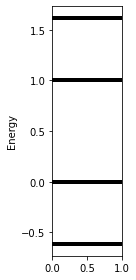

In [45]:
fig,ax=plt.subplots(figsize=(2,4))
for i in eig:plt.axhline(i,c="k",lw=4)
plt.ylabel("Energy")
plt.tight_layout()
plt.savefig("Manybody_eigen.png",dpi=400)
plt.show()

---
Projecting on to parity operator which is given by

$$\hat{P}=\begin{bmatrix}
1 & 0 & 0 & 0\\ 
0 & 1& 0 & 0\\ 
0 & 0 & -1 &0 \\ 
0& 0 &0 &-1
\end{bmatrix}$$

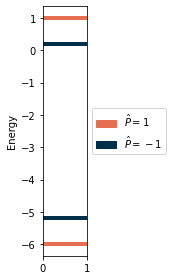

In [150]:
P=np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,-1,0],
    [0,0,0,-1]
])
c=[np.round(eval[n]@P@eval[n].conj()) for n in range(4)]
fig,ax=plt.subplots(figsize=(2.5,4))
for j in range(4):plt.axhline(eig[j],c="#e76f51" if c[j] ==1 else "#003049",lw=4)

import matplotlib.patches as mpatches   
red_patch = mpatches.Patch(color='#e76f51', label='$\hat{P}=1$')
blue_patch = mpatches.Patch(color='#003049', label='$\hat{P}=-1$')

plt.legend(handles=[red_patch, blue_patch],loc="center left",bbox_to_anchor=(1,0.5))

plt.ylabel("Energy")
plt.tight_layout()
plt.savefig("Manybody_eigen_colered.png",dpi=400)
plt.show()

Looking at the evolution of eigen value as function of $E_a$

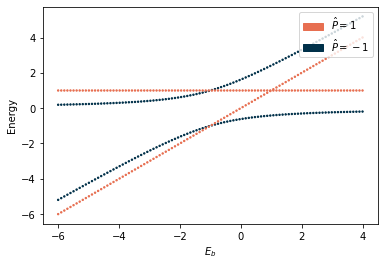

In [153]:
d=np.linspace(0,10,100)
e=[]
for i in d:
    eig,eval= H_bdg(e1=1,e2=4-i,d=1,eig=True)
    c=[np.round(eval[n]@P@eval[n].conj()) for n in range(4)]
    color=["","#e76f51","#003049"]
    plt.scatter([4-i]*4,np.real(eig),c=[color[int(i)] for i in c],s=2)
    
import matplotlib.patches as mpatches   
red_patch = mpatches.Patch(color='#e76f51', label='$\hat{P}=1$')
blue_patch = mpatches.Patch(color='#003049', label='$\hat{P}=-1$')
plt.legend(handles=[red_patch, blue_patch],loc="upper right")
plt.ylabel("Energy")
plt.xlabel("$E_b$")
plt.savefig("GS_depedence.png",dpi=400)
plt.show()